In [1]:
# Import modules
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
import cartopy.crs as ccrs
import cartopy.feature as cfeature
%matplotlib inline

# 1. Global Earthquakes
In this problem set, we will use this file from the USGS Earthquakes Database. The dataset is similar to the one you use in Assignment 02. Use the file provided (usgs_earthquakes.csv) to recreate the following map. Use the mag column for magnitude.

In [2]:
#  read data
usgs = pd.read_csv('usgs_earthquakes.csv')
usgs

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type
0,53:37.0,60.252000,-152.708100,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,ak11155107,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake
1,48:35.5,37.070300,-115.130900,0.00,1.33,ml,4.0,171.43,0.342000,0.0247,nn,nn00436847,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake
2,47:24.0,64.671700,-149.252800,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,ak11151142,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake
3,30:54.0,63.188700,-148.957500,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,ak11151135,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake
4,30:52.2,32.616833,-115.692500,10.59,1.34,ml,6.0,285.00,0.043210,0.2000,ci,ci37171541,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120103,10:16.0,60.963900,-146.762900,14.80,3.80,ml,NaN,NaN,NaN,0.6900,ak,ak11453391,2015-03-24T18:25:07.628Z,"29km SW of Valdez, Alaska",earthquake
120104,09:39.0,58.869100,-154.415900,108.40,2.40,ml,NaN,NaN,NaN,0.6700,ak,ak11453395,2014-12-10T01:04:25.209Z,"102km SSE of Old Iliamna, Alaska",earthquake
120105,09:25.3,38.843498,-122.825836,2.37,0.43,md,8.0,107.00,0.008991,0.0300,nc,nc72358451,2014-12-01T01:15:02.814Z,"9km WNW of Cobb, California",earthquake
120106,05:54.0,65.152100,-148.992000,9.50,0.40,ml,NaN,NaN,NaN,0.6900,ak,ak11453390,2014-12-10T01:03:01.225Z,"57km NW of Ester, Alaska",earthquake


In [3]:
# Create a new column Year
usgs['Year'] = usgs.apply(lambda col: col['updated'][0:4], axis=1)
usgs

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,Year
0,53:37.0,60.252000,-152.708100,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,ak11155107,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake,2014
1,48:35.5,37.070300,-115.130900,0.00,1.33,ml,4.0,171.43,0.342000,0.0247,nn,nn00436847,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake,2014
2,47:24.0,64.671700,-149.252800,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,ak11151142,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake,2014
3,30:54.0,63.188700,-148.957500,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,ak11151135,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake,2014
4,30:52.2,32.616833,-115.692500,10.59,1.34,ml,6.0,285.00,0.043210,0.2000,ci,ci37171541,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120103,10:16.0,60.963900,-146.762900,14.80,3.80,ml,NaN,NaN,NaN,0.6900,ak,ak11453391,2015-03-24T18:25:07.628Z,"29km SW of Valdez, Alaska",earthquake,2015
120104,09:39.0,58.869100,-154.415900,108.40,2.40,ml,NaN,NaN,NaN,0.6700,ak,ak11453395,2014-12-10T01:04:25.209Z,"102km SSE of Old Iliamna, Alaska",earthquake,2014
120105,09:25.3,38.843498,-122.825836,2.37,0.43,md,8.0,107.00,0.008991,0.0300,nc,nc72358451,2014-12-01T01:15:02.814Z,"9km WNW of Cobb, California",earthquake,2014
120106,05:54.0,65.152100,-148.992000,9.50,0.40,ml,NaN,NaN,NaN,0.6900,ak,ak11453390,2014-12-10T01:03:01.225Z,"57km NW of Ester, Alaska",earthquake,2014


In [4]:
# filter, keep only 2014
usgs2014 = usgs.loc[ usgs['Year'] == '2014']
usgs2014

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,Year
0,53:37.0,60.252000,-152.708100,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,ak11155107,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake,2014
1,48:35.5,37.070300,-115.130900,0.00,1.33,ml,4.0,171.43,0.342000,0.0247,nn,nn00436847,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake,2014
2,47:24.0,64.671700,-149.252800,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,ak11151142,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake,2014
3,30:54.0,63.188700,-148.957500,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,ak11151135,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake,2014
4,30:52.2,32.616833,-115.692500,10.59,1.34,ml,6.0,285.00,0.043210,0.2000,ci,ci37171541,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120102,16:21.0,62.795800,-150.387800,79.70,1.20,ml,NaN,NaN,NaN,0.4500,ak,ak11453411,2014-12-09T02:05:53.895Z,"54km NNW of Talkeetna, Alaska",earthquake,2014
120104,09:39.0,58.869100,-154.415900,108.40,2.40,ml,NaN,NaN,NaN,0.6700,ak,ak11453395,2014-12-10T01:04:25.209Z,"102km SSE of Old Iliamna, Alaska",earthquake,2014
120105,09:25.3,38.843498,-122.825836,2.37,0.43,md,8.0,107.00,0.008991,0.0300,nc,nc72358451,2014-12-01T01:15:02.814Z,"9km WNW of Cobb, California",earthquake,2014
120106,05:54.0,65.152100,-148.992000,9.50,0.40,ml,NaN,NaN,NaN,0.6900,ak,ak11453390,2014-12-10T01:03:01.225Z,"57km NW of Ester, Alaska",earthquake,2014


In [5]:
# select top 50 earthquake. here 51 is due to that No.52 earthquake is 6.0 mag. 
top50 = usgs2014.sort_values('mag', ascending = False).head(51)
usgs2014.sort_values('mag', ascending = False).head(52)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,Year
34318,07:23.1,-6.5858,155.0485,60.53,7.1,mww,NaN,21.0,3.729,0.88,us,usc000pft9,2014-07-01T02:37:56.000Z,"56km WSW of Panguna, Papua New Guinea",earthquake,2014
37367,57:58.8,-19.8927,-70.9455,28.42,6.9,mww,NaN,119.0,0.828,0.93,us,usc000nzwm,2014-05-29T23:32:13.000Z,"91km WNW of Iquique, Chile",earthquake,2014
50609,19:15.9,-29.9772,-177.7247,20.00,6.9,mww,NaN,35.0,0.751,0.99,us,usc000rkg5,2014-09-19T17:23:16.000Z,"80km SSE of Raoul Island, New Zealand",earthquake,2014
61294,54:41.0,-19.8015,-178.4001,615.42,6.9,mww,NaN,15.0,3.934,0.96,us,usb000ruzk,2014-10-17T21:12:13.000Z,"99km NNE of Ndoi Island, Fiji",earthquake,2014
47934,52:55.2,-55.4703,-28.3669,8.00,6.9,mww,NaN,25.0,4.838,0.76,us,usc000rngj,2014-09-26T11:49:45.000Z,"154km NNW of Visokoi Island,",earthquake,2014
78063,22:03.7,0.8295,146.1688,13.00,6.9,mww,NaN,12.0,6.393,0.93,us,usb000rzki,2014-10-29T19:52:55.000Z,Federated States of Micronesia region,earthquake,2014
32964,57:01.4,-53.4967,8.7220,11.18,6.8,mww,NaN,27.0,18.877,0.74,us,usb000pkxl,2014-07-01T02:38:09.000Z,Bouvet Island region,earthquake,2014
50587,06:20.7,-29.9414,-177.6073,26.59,6.7,mwc,NaN,43.0,0.748,0.76,us,usc000rkhj,2014-09-19T17:23:17.000Z,"79km SSE of Raoul Island, New Zealand",earthquake,2014
47776,15:09.3,-14.9831,-175.5096,18.00,6.7,mww,NaN,45.0,6.713,1.39,us,usc000rnku,2014-09-26T11:49:48.000Z,"201km SSE of Mata-Utu, Wallis and Futuna",earthquake,2014
47320,36:35.6,-21.4542,170.3546,106.00,6.6,mww,NaN,10.0,3.340,0.89,us,usb000q66s,2014-07-27T21:51:14.000Z,"204km WNW of Ile Hunter, New Caledonia",earthquake,2014


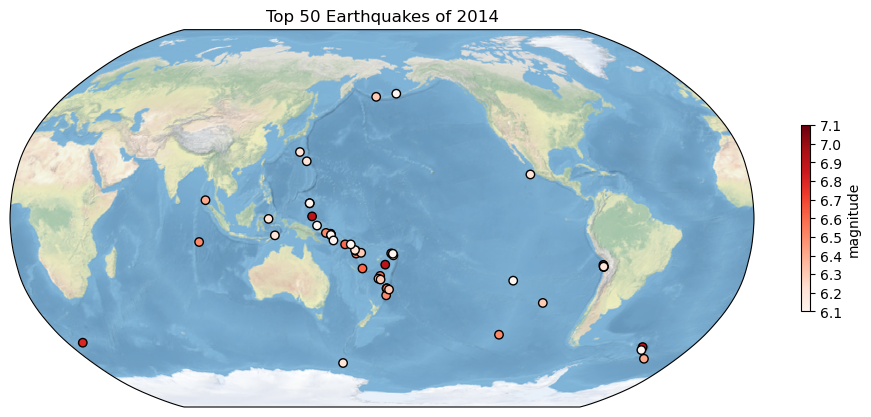

In [6]:
# Create and define the size of a figure object 
plt.figure(figsize=(12,11))

# Create an ax with Robinson projection style with 180 in the middle.
ax = plt.axes(projection=ccrs.Robinson(180))

# Add background
ax.stock_img()

# Set title
ax.set_title('Top 50 Earthquakes of 2014')

# Point Plot and style setting
a = ax.scatter('longitude', 'latitude', data=top50, transform=ccrs.PlateCarree(),
            s=37, c='mag', cmap='Reds',
            edgecolors='black', linewidths=1.0)

# Colorbar setting
plt.colorbar(a,shrink = 0.22,ticks = np.arange(6.0,7.2,0.1),label = 'magnitude')

# But it didn't look like the example map given in assignment.

# To recreate the map given as an example. 

In [7]:
Top50All = usgs.sort_values('mag', ascending = False).head(54)

#usgs.iloc[[53132,64647,103919,67518]]

# Drop these points that are missing in example map
Top50All = Top50All.drop(53132)
Top50All = Top50All.drop(64647)
Top50All = Top50All.drop(103919)
Top50All = Top50All.drop(67518)

# No.55 is 6.4 mag. choose 54 and drop 4 points 
usgs.sort_values('mag', ascending = False).head(55)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,Year
37371,46:47.3,-19.6097,-70.7691,25.00,8.2,mww,NaN,23.0,0.60900,0.66,us,usc000nzvd,2015-07-30T16:24:51.223Z,"94km NW of Iquique, Chile",earthquake,2015
50562,53:09.7,51.8486,178.7352,109.00,7.9,mww,NaN,22.0,0.13300,0.71,us,usc000rki5,2015-04-18T21:54:08.699Z,"19km SE of Little Sitkin Island, Alaska",earthquake,2015
36918,43:13.1,-20.5709,-70.4931,22.40,7.7,mww,NaN,44.0,1.02900,0.82,us,usc000p27i,2015-06-06T07:31:05.755Z,"53km SW of Iquique, Chile",earthquake,2015
33808,14:39.3,-11.2701,162.1481,22.56,7.6,mww,NaN,13.0,2.82800,0.71,us,usc000phx5,2015-04-18T21:54:27.398Z,"93km SSE of Kirakira, Solomon Islands",earthquake,2015
31496,28:00.8,-6.7547,155.0241,43.37,7.5,mww,NaN,16.0,3.82000,1.25,us,usb000pr89,2015-04-18T21:54:18.633Z,"70km SW of Panguna, Papua New Guinea",earthquake,2015
33537,36:19.2,-11.4633,162.0511,39.00,7.4,mww,NaN,17.0,2.88500,1.00,us,usc000piqj,2015-08-13T19:29:13.018Z,"112km S of Kirakira, Solomon Islands",earthquake,2015
95913,51:34.5,12.5262,-88.1225,40.00,7.3,mww,NaN,18.0,1.07800,0.70,us,usb000slwn,2015-08-13T19:35:02.679Z,"74km S of Intipuca, El Salvador",earthquake,2015
31850,27:24.9,17.3970,-100.9723,24.00,7.2,mww,NaN,46.0,2.25000,1.20,us,usb000pq41,2015-08-13T19:30:39.599Z,"33km ESE of Petatlan, Mexico",earthquake,2015
34318,07:23.1,-6.5858,155.0485,60.53,7.1,mww,NaN,21.0,3.72900,0.88,us,usc000pft9,2014-07-01T02:37:56.000Z,"56km WSW of Panguna, Papua New Guinea",earthquake,2014
106285,31:41.7,1.8929,126.5217,45.00,7.1,mww,NaN,18.0,1.39700,0.71,us,usc000sxh8,2015-03-20T18:42:02.735Z,"154km NW of Kota Ternate, Indonesia",earthquake,2015


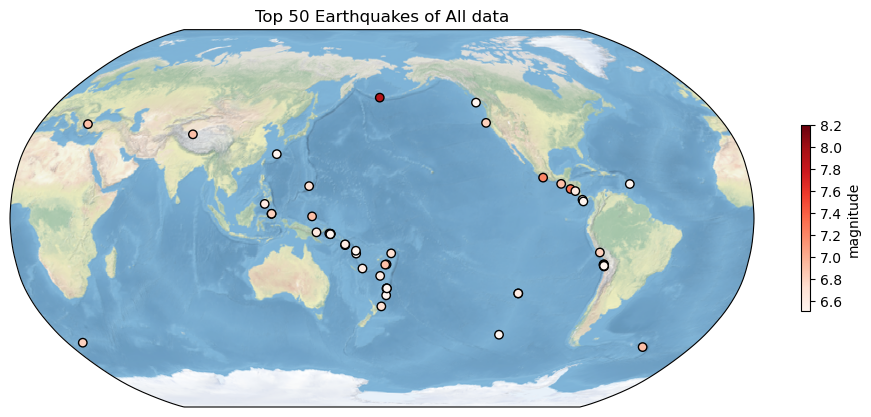

In [8]:
# Create and define the size of a figure object 
plt.figure(figsize=(12,11))

# Create an ax with Robinson projection style with 180 in the middle.
ax = plt.axes(projection=ccrs.Robinson(180))

# Add background
ax.stock_img()

# Set title
ax.set_title('Top 50 Earthquakes of All data')

# Point Plot and style setting
a = ax.scatter('longitude', 'latitude', data=Top50All, transform=ccrs.PlateCarree(),
            s=37, c='mag', cmap='Reds',
            edgecolors='black', linewidths=1.0)

# Colorbar setting
plt.colorbar(a,shrink = 0.22,ticks = np.arange(6.6,8.3,0.2),label = 'magnitude')

# 2. Explore a netCDF dataset
Browse the NASA’s Goddard Earth Sciences Data and Information Services Center (GES DISC) website. Search and download a dataset you are interested in. You are also welcome to use data from your group in this problem set. But the dataset should be in netCDF format. For this problem set, you are welcome to use the same dataset you used in Assignment 03.

2.1 Make a global map of a certain variable. Your figure should contain: a project, x label and ticks, y label and ticks, title, gridlines, legend, colorbar, masks or features, annotations, and text box.

In [9]:
# Open CSR Grace Data
GraceCSR = xr.open_dataset("CSR_GRACE_GRACE-FO_RL06_Mascons_all-corrections_v02.nc", engine="netcdf4")

In [10]:
# Change the time dimention.

# Day.txt viewed by Arcmap and summarized by myself manually
day = pd.read_csv("day.txt",header = None)
time = pd.to_datetime(day[0]).to_numpy()

# time dimention changed
GraceCSR.coords['time'] = ('time',time)

In [11]:
# Latest month for land 
data = GraceCSR.lwe_thickness.isel(time=-1)

Text(0.5, 1.0, '2022-08 global lwe_thickness')

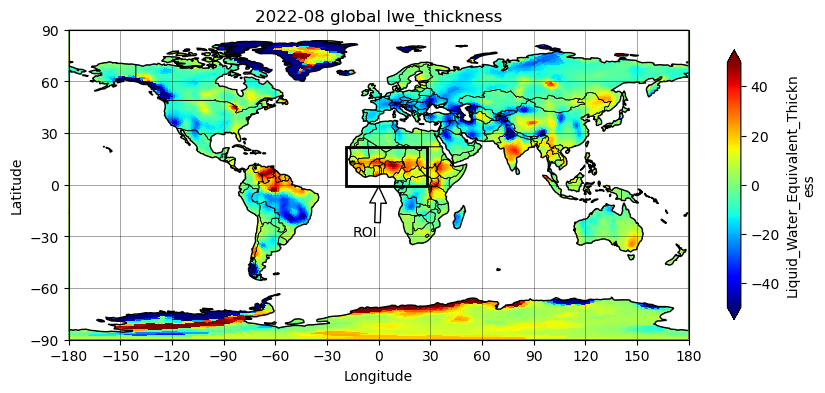

In [12]:
# Create and define the size of a figure object 
plt.figure(figsize=(10,5), dpi=100)

# Create an axes with PlateCarree projection style
proj = ccrs.PlateCarree() 
ax = plt.axes(projection=proj)

# Plot 
data.plot(ax=ax, transform=ccrs.PlateCarree(),robust = True, cmap = 'jet',cbar_kwargs={'shrink': 0.7})
         #vmin=250, vmax=300, cbar_kwargs={'shrink': 0.4})

# Add border lines over countries 
ax.add_feature(cfeature.NaturalEarthFeature(category='cultural',
                                           name='admin_0_countries',
                                           scale='110m',
                                           facecolor='none',
                                           edgecolor='black',
                                           linewidth=0.5))

# Add lat/lon gridlines, draw gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, color='black', alpha=0.5)

# Manipulate latitude and longitude gridline numbers and spacing
gl.ylocator = mticker.FixedLocator(np.arange(-90,90,30))
gl.xlocator = mticker.FixedLocator(np.arange(-180, 180, 30))

#axis setting
ax.set_xticks(np.arange(-180,181,30))
ax.set_yticks(np.arange(-90,91,30))
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

#Ocean
ax.add_feature(cfeature.OCEAN, facecolor='white',edgecolor='black', zorder=1)


# annotate
ax.annotate('ROI',xy = (0,-1),xytext = (-15,-30), color = 'black',
                    arrowprops = dict(facecolor = 'white', shrink = 1))

# box
ax.add_patch(mpatches.Rectangle( (-19,-1),47,23,facecolor = 'none',
                                edgecolor = 'black',linewidth=2) )

# title
ax.set_title('2022-08 global lwe_thickness')

2.2  Make a regional map of the same variable. Your figure should contain: a different project, x label and ticks, y label and ticks, title, gridlines, legend, colorbar, masks or features, annotations, and text box.

Text(0.5, 1.0, 'ROI 2022-08 global lwe_thickness')

D:\ANACONDA\lib\site-packages\cartopy\crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
D:\ANACONDA\lib\site-packages\cartopy\crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
D:\ANACONDA\lib\site-packages\cartopy\crs.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
D:\ANACONDA\lib\site-packages\cartopy\crs.py:256: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be

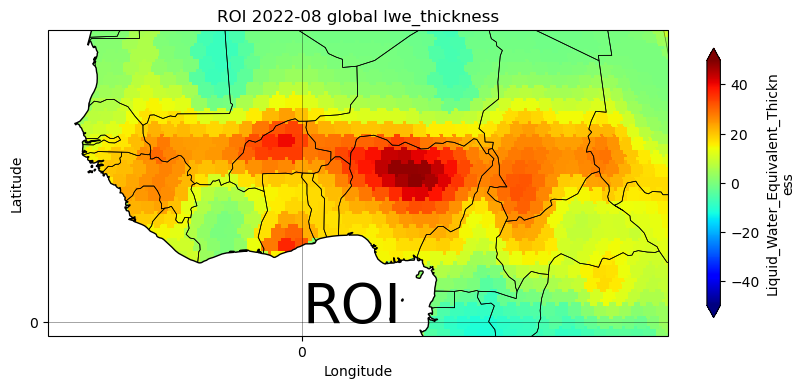

In [13]:
# Create and define the size of a figure object 
plt.figure(figsize=(10,5), dpi=100)

# Create an axes with Orthographic projection style
proj = ccrs.Orthographic() 
ax = plt.axes(projection=proj)

# Plot 
data.plot(ax=ax, transform=ccrs.PlateCarree(),robust = True, cmap = 'jet',cbar_kwargs={'shrink': 0.7})
         #vmin=250, vmax=300, cbar_kwargs={'shrink': 0.4})

# Add border lines over countries 
ax.add_feature(cfeature.NaturalEarthFeature(category='cultural',
                                           name='admin_0_countries',
                                           scale='110m',
                                           facecolor='none',
                                           edgecolor='black',
                                           linewidth=0.5))

# Add lat/lon gridlines, draw gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, color='black', alpha=0.5)

# Manipulate latitude and longitude gridline numbers and spacing
gl.ylocator = mticker.FixedLocator(np.arange(-90,90,30))
gl.xlocator = mticker.FixedLocator(np.arange(-180, 180, 30))

#axis setting
ax.set_xticks([0])
ax.set_yticks([0])
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

ax.add_feature(cfeature.OCEAN, facecolor='white',edgecolor='black', zorder=1)

# set region
extent = [-19,28,-1,22]
ax.set_extent(extent)

#text
ax.text(0,0,'ROI',size = 40)

#title
ax.set_title('ROI 2022-08 global lwe_thickness')